**GET THE ADDRESS FROM THE UNI-SWAP API**

To start with the query process, first we have to take the api of the subgraph.
1. we have to visit The Graph Explorer to view all of the hosted subgraphs that exist for the Ethereum blockchain.
2. Select a subgraph page and note down the http query address for uniswap i.e.
https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2
3. The http query address is needed in our Python code and is the endpoint that contains the blockchain data

**IMPORTING ALL THE NECESSARY LIBRARIES**

In [61]:
import requests      #to get the json data from the api
import numpy as np
import pandas as pd  #to convert the json into dataframe
import seaborn as sns #to plot some data
import matplotlib.pyplot as plt

**FUNCTION DEFINITION TO MAKE API CALLS WHICH BASICALLY RETURNS A JSON FILE TO US**

In [62]:
def execute(query,variables = None):

    # endpoint where we are making the request
    request = requests.post('https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',json={'query': query,'variables': variables})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.'.format(request.status_code))

**QUERY TO FIND TOKEN ID's OF SYMBOL UNI**

In [63]:
query = """
{
  tokens(where:{symbol:"UNI"}){
    id
  }
}
"""
result = execute(query) #function calling
UNI_token = [] #list to store the token id of all token's with symbol UNI

for i in result["data"]["tokens"]:  #formatting the query result
  UNI_token.append(i["id"])

print(UNI_token)

['0x0478d05f4960fa5c7880a6346a5dd10d894e87ef', '0x1f9840a85d5af5bf1d1762f925bdaddc4201f984', '0x24382731129c7b77cf1fb744e509e32572fa4a45', '0x2730d6fdc86c95a74253beffaa8306b40fedecbb', '0x3158e7fdfeacd9cb6744fb922f68d83321c0da64', '0x3e370a6c8255b065bd42bc0ac9255b269cfcc172', '0x41870c93bc97221a741f955586bef5cfcfa186fa', '0x5644b9eed6f578c820e6fa500b3c9f21d22347d8', '0x8a3afc69b947b9368af68104fa3ac512b58b930e', '0x8b16acf50051bb6efd68bdf35099b798db0ff4b7', '0x907455194480175560b05a405f47d298cb19b21d', '0x9629aa8ce8e61004952ab619d683576f4ec5478b', '0xcae516aa57d04ebf9b92813050282333f7587d2f', '0xebfee807881a0258311aeae07e2e3ae49aa41f29', '0xf17785cce27f0d33b82739ee20abd57298caa88a']


**QUERY TO FIND TOKEN ID'S OF SYMBOL WETH**

In [64]:
query = """
{
  tokens(where:{symbol:"WETH"}){
    id
  }
}
"""
result = execute(query) #function calling
WETH_token = [] #list to store the token id of all token's with symbol UNI

for i in result["data"]["tokens"]:  #formatting the query result
  WETH_token.append(i["id"])

print(WETH_token)

['0x477b466750c31c890db3208816d60c8585be7f0e', '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', '0xd73d6d4c463df976399acd80ea338384e247c64b']


**QUERY TO FIND PAIR ID's OF ALL POSSIBLE COMBINATIONS OF UNI/WETH FROM ABOVE LIST OF TOKEN ID's**

In [65]:
PAIR_ID = []
for uni in UNI_token:
  for weth in WETH_token:
    query = """query($a: String!, $b: String!) 
      {
      pairs(where: {token0: $a,token1: $b })
        {
        id
        }
      }"""
    variables = {"a": uni, "b": weth}
    result = execute(query,variables)
    if len(result["data"]["pairs"]) != 0:
      PAIR_ID.append(result["data"]["pairs"][0]["id"])
print(PAIR_ID)

['0x4330e23e6fb28882060c8a125c4f1d2400b7b2d9', '0xd3d2e2692501a5c9ca623199d38826e513033a17', '0x7c498db5cb65b398e118eda7e71ac7306e0e2923', '0x63ff582264aa89a1f870564985c0c871979a898e', '0x6c7e7a1706ad680fefeb470371e0871cc6d7b19a', '0xa47ea5b74b6879c52250794376443eebd8a17bb3', '0x822130268fba14006b92c4d13b8b6fe3196ea2f0', '0xf615e9d45b998f605a5c1e27839c46670717a931', '0x5e0c41ec47d6675560b8608d8779ba949c5d9153', '0xf05a0ec162a03585ab06a5e112eda9b0348d1da0', '0xec2915ad1e9ac5cf68dda0f3ebdafbc8b8f69bea', '0x5709341ce31136276108a38c1901a90e19ac1f79']


**QUERY TO FIND 1000 RECENT SWAPS BETWEEN THE PAIRS CORRESPONDING TO THE RESPECTIVE PAIR ID**

In [66]:
df = pd.DataFrame()
for pair in PAIR_ID: 
    query = """query($a: String!)
    {
    swaps(first:1000, orderBy: timestamp, orderDirection: desc, where:{ pair: $a }) 
    {
        pair {
          reserveUSD
          id
        }
        amount0In
        amount0Out
        amount1In
        amount1Out
        timestamp
        amountUSD
    }
    }
    """
    variables = {"a": pair}
    result = execute(query,variables)
    df = df.append(result['data']['swaps'],ignore_index=True)   

In [67]:
pd.set_option('display.max_columns', None) #so as to view all columns in the dataframe
print(df)

                    amount0In               amount0Out             amount1In  \
0                           0      5.50970290763971213                  0.08   
1                           0                       15  0.208334881832740216   
2                           0    16.946378445231014027                  0.22   
3                           0                       10  0.122817431887499233   
4      101.131602080728787541                        0                     0   
...                       ...                      ...                   ...   
1098                     2000                        0                     0   
1099  1646.918584924192367448                        0                     0   
1100                        0    175.95800172347654216                   0.1   
1101                     4000                        0                     0   
1102                        0  1646.918584924192367448                     1   

                amount1Out             

**DATA CLEANING TO CONVERT IT INTO THE FORMAT REQUIRED**

In [68]:
pool_id = []
liquidity = []
for i in range(len(df)):
  pool_id.append(df["pair"][i]["id"])
  liquidity.append(df["pair"][i]["reserveUSD"])

**DATA FORMATTING**

The base currency took into consideration for these operations was UNI and quote currency is WETH. Hence according to the API documentation, whenever amount0In was not equal to zero in the data it means it has been sold. Similarly, Pool id and liquidity of the pool has been formatted from the pair schema.

In [69]:
df["TIMESTAMP"] = df["timestamp"]
df['BASE CURRENCY QUANTITY TRADED'] = np.where((df['amount0In'] > df['amount0Out']), df['amount0In'], df['amount0Out'])
df['QUOTE CURRENCY QUANTITY TRADED'] = np.where((df['amount1In'] > df['amount1Out']), df['amount1In'], df['amount1Out'])
df['SIDE'] = np.where((df['amount0In'] > df['amount0Out']), "sell", "buy")
df['VOLUME IN USD'] = df["amountUSD"]
df = df.assign(POOL_ID = pool_id, LIQUIDITY_IN_POOL = liquidity)

**DELETING THE NOT NEEDED COLUMNS AFTER THE NEW COLUMNS HAVE BEEN CREATED**

In [70]:
del df['amountUSD'],df["amount1Out"],df["pair"],df["timestamp"], df['amount0In'],df['amount0Out'],df['amount1In']

**MAKING THE DATA TYPE OF SOME COLUMNS FOR THE PURPOSE OF PLOTTING**


In [71]:
df.astype({'BASE CURRENCY QUANTITY TRADED':float,'QUOTE CURRENCY QUANTITY TRADED':float,'VOLUME IN USD':float})

,TIMESTAMP,BASE CURRENCY QUANTITY TRADED,QUOTE CURRENCY QUANTITY TRADED,SIDE,VOLUME IN USD,POOL_ID,LIQUIDITY_IN_POOL
0,1600479068,5.509703,0.080000,buy,30.553085,0x4330e23e6fb28882060c8a125c4f1d2400b7b2d9,0.00000000000009270166726518542246770840448501383
1,1600478087,15.000000,0.208335,buy,80.605005,0x4330e23e6fb28882060c8a125c4f1d2400b7b2d9,0.00000000000009270166726518542246770840448501383
2,1600476413,16.946378,0.220000,buy,85.354315,0x4330e23e6fb28882060c8a125c4f1d2400b7b2d9,0.00000000000009270166726518542246770840448501383
3,1600476364,10.000000,0.122817,buy,47.290749,0x4330e23e6fb28882060c8a125c4f1d2400b7b2d9,0.00000000000009270166726518542246770840448501383
4,1624384788,101.131602,0.879526,sell,1680.791508,0xd3d2e2692501a5c9ca623199d38826e513033a17,77278029.34537824133297129549459079
...,...,...,...,...,...,...,...
1098,1600303775,2000.000000,1.071432,sell,401.559335,0x5709341ce31136276108a38c1901a90e19ac1f79,0.00000000000002355424209292357157384813377270777
1099,1600303775,1646.918585,0.916210,sell,343.950695,0x5709341ce31136276108a38c1901a90e19ac1f79,0.00000000000002355424209292357157384813377270777
1100,1600303736,175.958002,0.100000,buy,37.730582,0x5709341ce31136276108a38c1901a90e19ac1f79,0.00000000000002355424209292357157384813377270777
1101,1600303660,4000.000000,2.354760,sell,868.850932,0x5709341ce31136276108a38c1901a90e19ac1f79,0.00000000000002355424209292357157384813377270777


**CONVERTING TIME STAMP FROM UNIX FORMAT TO READABLE FORMAT**

In [72]:
df["time Stamp"] = pd.to_datetime(df['TIMESTAMP'], unit='s')
del df["TIMESTAMP"]

**PLOT SHOWING THE POOL IN WHICH MORE TRANSACTIONS HAPPENNED MENTIONING POOL ID IN X AXIS AND COUNT IN Y AXIS**

As you can see in the below bar chart, the orange bar had nearly 1000 transactions in the total of 1100 swaps queried by us which tells us that the liquidity of that pool is greater compared to others.

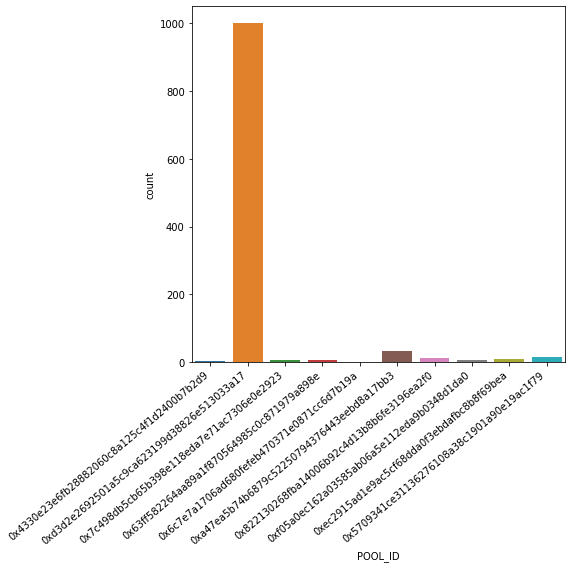

In [73]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="POOL_ID",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**FREQUENCY OF THE BASE CURRENCY TRANSACTION IN THE DATA**

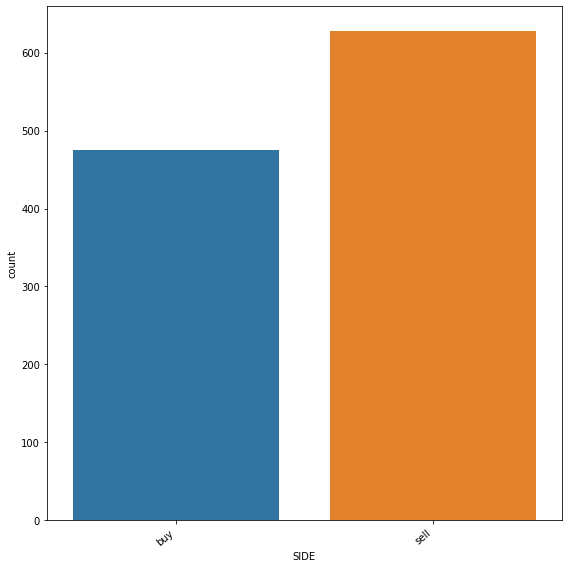

In [75]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="SIDE",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**TO CONVERT THE DATA FRAME INTO AN EXCEL FILE FOR THE PURPOSE OF VIEWING IT PROPERLY**

In [74]:
df.to_excel("output.xlsx")